# Correcting probabilities

Shows how to correct readout errors and transform to true probability distribution.

In [1]:
import numpy as np
from qiskit import *
from qiskit_ibm_runtime.fake_provider import FakeMelbourneV2
from qiskit.visualization import plot_histogram
import mthree

## Setup experiment

In [2]:
backend = FakeMelbourneV2()

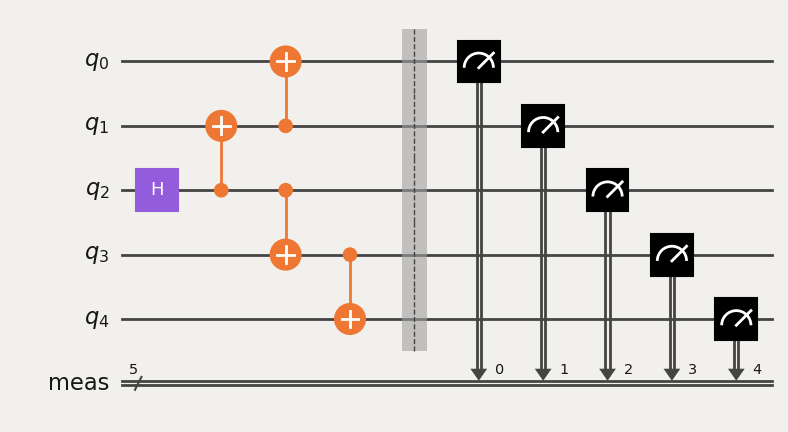

In [3]:
qc = QuantumCircuit(5)
qc.h(2)
qc.cx(2,1)
qc.cx(1,0)
qc.cx(2,3)
qc.cx(3,4)
qc.measure_all()
qc.draw('mpl')

## Compile and run circuits and perform mitigation

In [4]:
trans_qc = transpile(qc, backend)

In [5]:
raw_counts = backend.run(trans_qc, shots=2048).result().get_counts()

In [6]:
mit = mthree.M3Mitigation(backend)
mit.cals_from_system(range(qc.num_qubits))

In [7]:
quasi = mit.apply_correction(raw_counts, range(qc.num_qubits))
probs = quasi.nearest_probability_distribution()

## Plot result

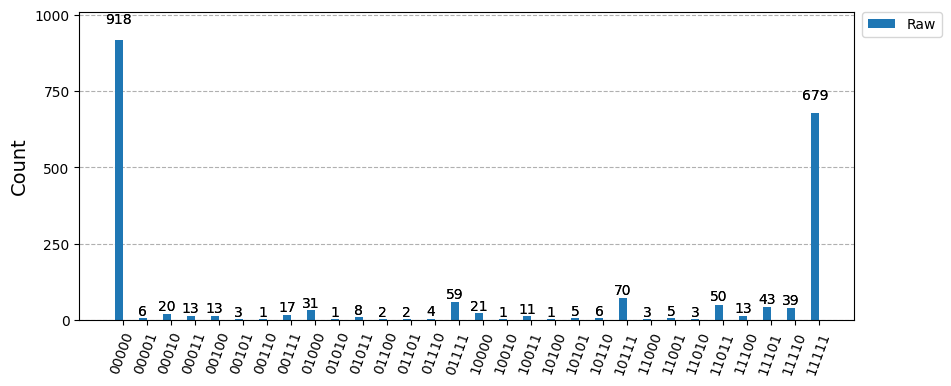

In [8]:
plot_histogram([raw_counts, probs], figsize=(10,4), legend=['Raw', 'M3'])